In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
print("Pandas version used: " + pd.__version__)
print("Seaborn version used: " + sns.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)

Pandas version used: 1.0.5
Seaborn version used: 0.10.1
Matplotlib version used: 3.2.2


In [2]:
# Read in the data that was cleaned up previously in data_cleaning.ipynb
ins_data = pd.read_csv('ins_data_clean.csv')

In [3]:
ins_data.head()

,Unnamed: 0,age,bmi,children,charges,sex_female,smoker_yes
0,0,19,27.90,0,16884.92,1,1
1,1,18,33.77,1,1725.55,0,0
2,2,28,33.00,3,4449.46,0,0
3,3,33,22.70,0,21984.47,0,0
4,4,32,28.88,0,3866.86,0,0


In [4]:
# Generate some basic information about each of the columns:
ins_data.describe()

,Unnamed: 0,age,bmi,children,charges,sex_female,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663572,1.094918,13270.422280,0.494768,0.204783
std,386.391641,14.049960,6.097951,1.205493,12110.011259,0.500160,0.403694
min,0.000000,18.000000,15.960000,0.000000,1121.870000,0.000000,0.000000
25%,334.250000,27.000000,26.297500,0.000000,4740.287500,0.000000,0.000000
50%,668.500000,39.000000,30.400000,1.000000,9382.030000,0.000000,0.000000
75%,1002.750000,51.000000,34.692500,2.000000,16639.915000,1.000000,0.000000
max,1337.000000,64.000000,53.130000,5.000000,63770.430000,1.000000,1.000000


From the above information, we can see that the average age is 39, the average BMI is 30.66, and the mean charge amount is $13,270.

Let's look at our target variable, charges, a bit more:

Text(0.5, 1.0, 'Frequency of Charge Amounts')

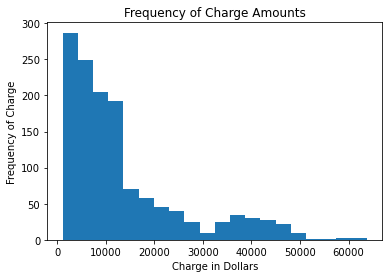

In [5]:
# Display a histogram with 20 bins showing the frequency of charges:
plt.hist(ins_data.charges,bins=20)
plt.xlabel("Charge in Dollars")
plt.ylabel("Frequency of Charge")
plt.title("Frequency of Charge Amounts")

There are obviously a large amount of rather small charges, so it will be interesting to see which features, if any, help explain the larger charges that do occur.

Let's take a look at the continuous feature variables and how they might correlate with charges:

Text(0.5, 1.0, 'Correlation Between Continuous Variables')

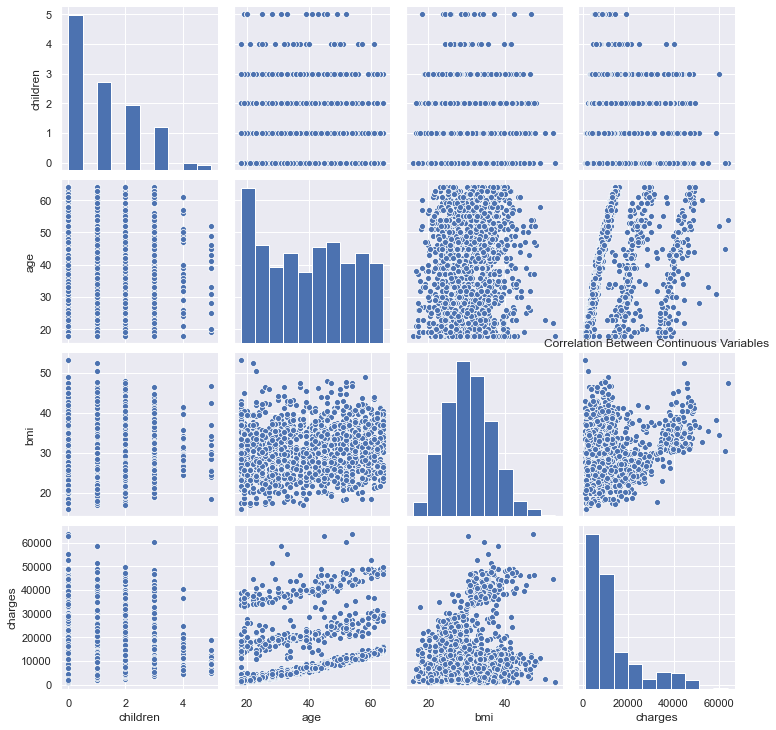

In [6]:
# Using the seaborn pairplot to visualize multiple scatter plots at once:
sns.set(style='darkgrid')
columns = ['children','age','bmi','charges']
sns.pairplot(ins_data[columns])
plt.title("Correlation Between Continuous Variables")

BMI and Age seem like they might have a group of positively-correlated observations with the charges amount, but they are definitely not obviously linear.

According to the CDC (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html), the normal healthy range for BMI is between 18.5 and 24.9. That means any BMI 25 and over is considered "overweight", while a BMI over 30 is "obese". Intuitively, it would make sense of charges increased as BMI did.

Let's first see what a heat map of the correlations might reveal:

Text(0.5, 1.0, 'Correlation Between Continuous Variables')

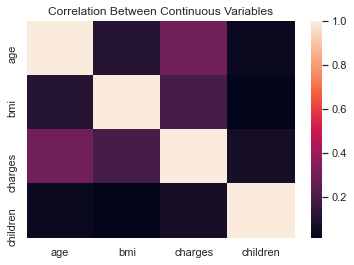

In [7]:
ins_cont_data = ins_data[["age","bmi","charges","children"]]
sns.heatmap(ins_cont_data.corr())
plt.title("Correlation Between Continuous Variables")

There does not seeem to be much of a correlation between the continuous variables, but it can be hard to visualize on just a heat map. It does seem clear, however, that number of children is not a useful feature. We can probably drop it later. 
<br><br>We'll try plotting some regression lines to see if anything stands out that may not have shown up on the heatmap.

Let's start with BMI vs. Charges. Those seem like they would inuitively be related:

Text(0.5, 1.0, 'Charges vs. BMI')

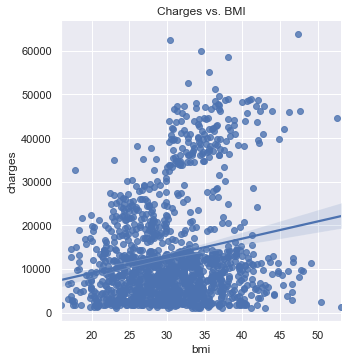

In [8]:
# Let's use the Seaborn lmplot function to see what regressing charges on to BMI produces:
sns.lmplot(x ='bmi', y ='charges', data = ins_data)
plt.title("Charges vs. BMI")

This lmplot reveals a slight positive correlation, but overall it seems that BMI alone does not seem to explain the increase in charges incurred. There is a significant amount of variance. Let's see what happens if we apply some of the other binary features as hues. Let's start with gender:

Text(0.5, 1.0, 'Charges vs. BMI + Sex')

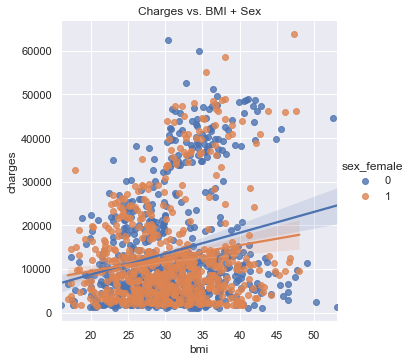

In [9]:
# Add gender as a hue using the sex_female dummy variable. 0 is male, 1 is female:
sns.lmplot(x ='bmi', y ='charges', data = ins_data, hue='sex_female')
plt.title("Charges vs. BMI + Sex")

Based on the above lmplot, gender does not seem to reveal any more useful information about the relationship between BMI and charges. Let's try smoker status next:

Text(0.5, 1.0, 'Charges vs. BMI + Smoker Status')

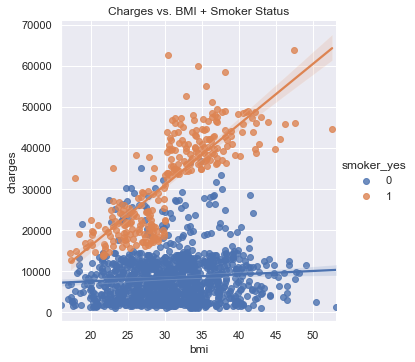

In [10]:
# Add smoker status as a hue using the smoker_yes dummy variable. 0 is non-smoker, 1 is smoker:
sns.lmplot(x ='bmi', y ='charges', data = ins_data, hue='smoker_yes')
plt.title("Charges vs. BMI + Smoker Status")

Adding smoker status as a hue really demonstrates how important of a predictor it is when combined with BMI. Just to visualize it better, let's separate smokers and non-smoker into their own plots. We can also set the hue to use sex just to make sure nothing else jumps out:

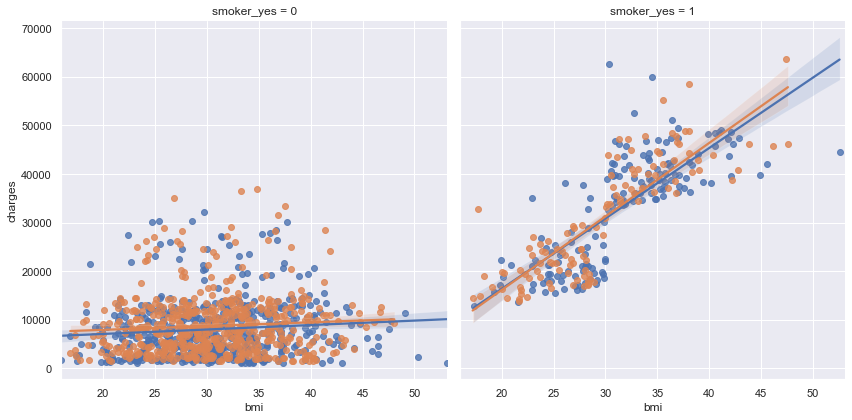

In [11]:
grid_plots = sns.FacetGrid(ins_data, col="smoker_yes", hue="sex_female", height=6, aspect=1)
grid_plots.map(sns.regplot, "bmi", "charges")

There are some definite outliers amongst both groups, especially non-smoking, but overall it's clear that being a smoker with higher BMI is correlated with significantly higher medical charges. Sex does not seem to reveal anything, as we saw before.

Next, let's look into how age factors into the charges while still keeping smokers separate since it obviously makes such a big difference:

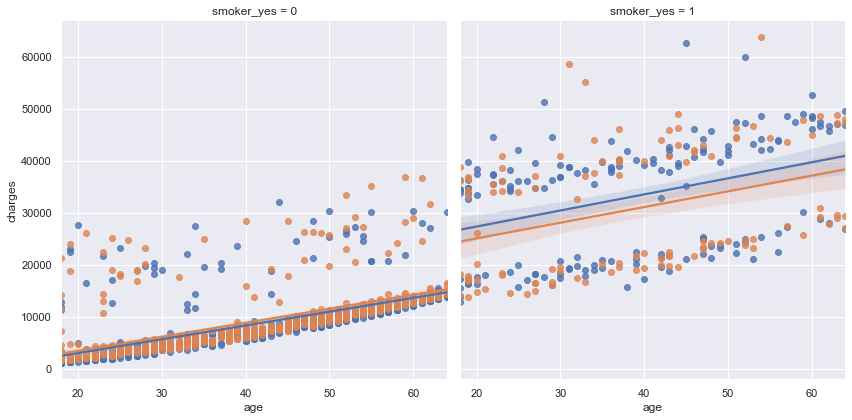

In [12]:
grid_plots = sns.FacetGrid(ins_data, col="smoker_yes", hue="sex_female", height=6, aspect=1)
grid_plots.map(sns.regplot, "age", "charges")

It would appear that age does seem to correlate with an increase in charges, which makes sense. It is also obvious that smoking has a significant impact on cost, especially on β₀. All smokers incur charges higher than the mean charge of $13,270.

The variance is quite high, though, and it seems gender still makes little to no difference.

We will end here by dropping 'children' as a feature since it did not seem very useful earlier and writing over the CSV file:

In [13]:
ins_data.drop('children', axis=1, inplace=True)
ins_data.to_csv('ins_data_clean.csv')